___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [187]:
import pandas as pd
import numpy as np
import requests
import cchardet as chardet
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
import matplotlib.pyplot as plt
from ipywidgets import interact
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import shap
from scikitplot.metrics import plot_precision_recall
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
import PyPDF2
from sklearn.metrics import average_precision_score
from xgboost import XGBClassifier

read the pdf file and get columns name and description

In [188]:
pdf_file = open('ANSUR II Databases Overview.pdf', 'rb')

In [189]:
pdf_reader = PyPDF2.PdfReader(pdf_file)
num_pages = len(pdf_reader.pages)
print(len(pdf_reader.pages))

8


In [190]:
dataDescription = pd.DataFrame(columns=['name', 'Description'])
dataDescription

,name,Description


In [191]:
for i in range (1,6):
    page = pdf_reader.pages[i]
    text = page.extract_text()
    columnPage = text.split('')
    for j in range(1,len(columnPage)):
        index = columnPage[j].split('–')
        index0 = index[0].replace('\n', '').strip()
        index1 = index[1].replace('\n', '').strip()
        dataDescription = dataDescription.append({'name':index0, 'Description':index1}, ignore_index=True)
        

In [192]:
dataDescription.head()

,name,Description
0,subjectid,A unique number for each participant measured ...
1,SubjectBirthLocation,Subject Birth Location; a U.S. state or foreig...
2,SubjectNumericRace,Subject Numeric Race; a single or multi -digit...
3,Ethnicity,self-reported ethnicity (verified through inte...
4,DODRace,Department of Defense Race; a single digit ind...


In [193]:
dataDescription

,name,Description
0,subjectid,A unique number for each participant measured ...
1,SubjectBirthLocation,Subject Birth Location; a U.S. state or foreig...
2,SubjectNumericRace,Subject Numeric Race; a single or multi -digit...
3,Ethnicity,self-reported ethnicity (verified through inte...
4,DODRace,Department of Defense Race; a single digit ind...
5,Gender,“Male” or “Female”
6,Age,Participant’s age in years
7,Heightin,"Height in Inches; self -reported, comparable t..."
8,Weightlbs,"Weight in Pounds; self -reported, comparable t..."
9,WritingPreference,"Writing Preference; “Right hand”, “Left hand”,..."


## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [194]:
femaleData = pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

In [195]:
femaleData.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

#### When try to read the male data an error appears "'utf-8' codec can't decode byte 0xe9 in position 158656: invalid continuation byte" So we need to know the encoding of file

In [196]:
maleencoding = chardet.detect(requests.get("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr").content)['encoding']
maleencoding

'ISO-8859-2'

In [197]:
maleData = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr', encoding= maleencoding)

In [198]:
maleData.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

### now will concat the male and  female data to become one dataframe

find the difference columns and chake if is just case insensitive rename the columns if not delete it and than concat tham

In [199]:
differencecolumns = maleData.columns.difference(femaleData.columns)
if len (differencecolumns) > 0 :
    differencecolumns1 = femaleData.columns.difference(maleData.columns)
    renamecolumns = []
    for i in range (len (differencecolumns)):
        caseinsensitive = False
        for j in range (len (differencecolumns1)):
            if differencecolumns[i].casefold() == differencecolumns1[j].casefold() :
                maleData.rename(columns={differencecolumns[i]:differencecolumns1[j]},inplace=True)
                caseinsensitive = True
                differencecolumns1 = differencecolumns1.delete(j)
        if caseinsensitive :
            differencecolumns = differencecolumns.delete(i)
    
    femaleData.drop(differencecolumns1, axis = 1, inplace = True)    
    maleData.drop(differencecolumns, axis = 1, inplace = True)

In [200]:
allData = pd.concat([femaleData, maleData], axis=0, ignore_index=True)

## Explore Data

In [201]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [202]:
allData.dtypes

SubjectId                          int64
abdominalextensiondepthsitting     int64
acromialheight                     int64
acromionradialelength              int64
anklecircumference                 int64
axillaheight                       int64
balloffootcircumference            int64
balloffootlength                   int64
biacromialbreadth                  int64
bicepscircumferenceflexed          int64
bicristalbreadth                   int64
bideltoidbreadth                   int64
bimalleolarbreadth                 int64
bitragionchinarc                   int64
bitragionsubmandibulararc          int64
bizygomaticbreadth                 int64
buttockcircumference               int64
buttockdepth                       int64
buttockheight                      int64
buttockkneelength                  int64
buttockpopliteallength             int64
calfcircumference                  int64
cervicaleheight                    int64
chestbreadth                       int64
chestcircumferen

In [203]:
allData.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [204]:
allData.tail()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
6063,29442,235,1353,312,216,1263,228,193,384,318,241,457,70,321,301,137,917,231,878,587,497,345,1444,266,954,238,1231,807,606,306,36,61,22,195,762,95,255,329,277,533,460,1073,81,193,182,151,554,187,323,69,301,353,1025,595,405,422,474,523,476,68,371,123,378,427,1304,112,418,259,1096,348,150,883,865,568,1688,1688,1368,1079,579,162,758,447,140,869,1557,442,279,816,210,347,1016,675,163,778,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand
6064,29443,247,1473,336,234,1346,253,196,428,374,284,536,76,319,316,135,1049,252,899,632,517,399,1533,323,1072,242,1301,848,695,378,35,60,20,299,807,103,263,341,327,600,476,1088,94,222,191,149,558,196,327,67,356,395,1057,590,468,473,491,565,510,67,420,117,392,430,1433,114,447,265,1199,356,146,938,903,606,1818,1765,1456,1146,662,171,785,472,135,886,1715,475,351,978,235,385,1082,896,178,873,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,91B,Oklahoma,1,NaN,1,22,71,194,Right hand
6065,29447,264,1394,313,227,1280,245,193,407,367,271,501,74,323,316,142,1038,276,857,614,502,378,1469,290,1045,247,1263,787,668,337,38,62,26,257,784,101,263,340,312,540,455,1045,83,207,183,148,555,194,340,74,334,362,1032,560,434,450,464,527,466,71,413,118,416,444,1310,110,407,257,1181,333,135,895,860,571,1642,1690,1384,1096,605,178,750,439,127,858,1682,483,333,991,258,353,1011,832,178,822,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,13B,Oklahoma,1,NaN,1,23,67,186,Right hand
6066,29451,203,1417,327,223,1314,250,196,419,365,271,493,75,342,327,138,929,209,898,598,499,389,1483,284,984,228,1271,846,603,314,37,61,22,237,782,98,266,322,299,552,461,1091,92,218,192,150,560,197,326,65,320,352,1050,630,440,445,480,542,489,70,364,123,387,414,1388,115,432,254,1162,358,154,900,874,576,1760,1718,1405,1116,544,170,779,453,118,886,1589,430,293,783,192,350,1062,731,172,837,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,13P,Oklahoma,1,NaN,1,22,69,165,Right hand
6067,29452,327,1523,358,226,1408,269,225,442,379,275,531,81,359,364,150,1009,254,981,659,550,396,1595,308,1144,281,1349,931,637,313,36,61,24,214,780,111,295,377,317,601,519,1212,95,223,205,153,615,22

In [205]:
allData.sample(10)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
2254,11348,280,1553,372,242,1435,270,200,445,394,302,560,75,353,341,155,1067,264,987,669,535,433,1639,306,1182,287,1401,899,723,451,35,73,22,254,846,110,276,401,337,672,526,1236,95,227,204,163,584,195,353,70,362,407,1137,685,486,495,531,590,533,82,424,120,428,467,1578,123,453,304,1275,402,170,965,999,660,1997,1881,1545,1212,646,195,943,519,141,993,1780,484,357,1005,261,402,1153,1054,183,877,Male,26-Oct-10,Fort Hood,Regular Army,Combat Service Support,88N,Iowa,41,Korean,1,24,75,226,Right hand
801,18403,228,1315,306,204,1224,216,176,334,290,230,430,60,310,292,123,1010,244,864,621,514,355,1368,250,869,233,1174,818,618,353,33,53,19,203,689,90,238,328,261,481,448,1046,79,187,181,143,547,187,297,65,342,389,1016,590,350,372,452,526,481,68,427,108,296,342,1308,107,394,239,993,326,125,799,800,526,1604,1584,1319,1069,654,172,725,439,119,868,1460,380,275,834,214,348,995,634,155,774,Female,13-Jul-11,Fort Lee,Regular Army,Combat Service Support,92A,Georgia,2,NaN,2,19,62,136,Right hand
3665,15919,201,1479,346,220,1375,251,200,409,305,256,477,78,317,302,140,922,226,880,608,500,375,1542,285,995,235,1303,861,574,334,39,66,23,234,837,102,267,349,278,548,483,1128,85,209,197,148,547,186,340,74,318,342,1092,580,400,426,496,565,511,78,376,128,368,409,1505,114,450,271,1098,376,154,937,874,611,1834,1795,1465,1139,543,162,807,484,119,902,1614,459,284,799,188,401,1086,701,172,874,Male,18-Apr-11,Fort Drum,Regular Army,Combat Service Support,25H,Washington,1,NaN,1,32,71,160,Right hand
5259,27764,203,1364,320,215,1248,232,184,410,326,261,473,72,318,306,136,936,195,848,586,486,360,1444,279,987,233,1218,805,533,319,35,59,20,240,781,95,252,320,290,543,450,1070,83,200,175,151,555,189,320,64,327,343,1008,615,415,451,446,509,462,68,384,117,372,409,1326,104,410,254,1135,350,150,896,873,560,1711,1678,1372,1059,548,150,769,425,133,867,1497,455,278,752,186,345,1011,658,166,799,Male,3-Feb-12,Fort Huachuca,Regular Army,Combat Service Support,35D,South Carolina,1,NaN,1,23,68,150,Right hand
280,15009,229,1315,296,210,1229,249,182,366,312,293,438,66,315,280,140,1006,229,858,578,469,342,1397,262,908,229,1185,772,542,303,34,57,18,229,746,102,250,324,263,476,453,1056,79,189,181,155,587,191,315

In [206]:
allData.shape

(6068, 108)

In [207]:
allData.duplicated().sum()

0

In [208]:
allData.isnull().sum().sum()

4647

In [209]:
for i in allData.columns :
    if (len(allData[i]) * 0.25 ) <= (allData[i].isnull().sum()) :
        allData.drop(i, axis = 1, inplace = True) 
allData = allData[~allData.isnull().any(axis=1)]

In [210]:
allData.isnull().sum().sum()

0

In [211]:
datadescribe = allData.describe().T
datadescribe

,count,mean,std,min,25%,50%,75%,max
SubjectId,6068.0,20757.198418,13159.390894,10027.0,14841.75,20063.5,27234.50,920103.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0


In [212]:
allData.describe(include=['object'], exclude=['int64']).T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
WritingPreference,6068,3,Right hand,5350


In [213]:
numberRow = datadescribe.index.tolist()
numberRow

['SubjectId',
 'abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'earlength',
 'earprotrusion',
 'elbowrestheight',
 'eyeheightsitting',
 'footbreadthhorizontal',
 'footlength',
 'forearmcenterofgriplength',
 'forearmcircumferenceflexed',
 'forearmforearmbreadth',
 'forearmhandlength',
 'functionalleglength',
 'handbreadth',
 'handcircumference',
 'handlength',
 'headbread

In [214]:
allData.shape

(6068, 107)

In [215]:
states_only = ['California', 'New York', 'Texas', 'Indiana', 'Oklahoma', 'Illinois',
          'Florida', 'Minnesota', 'Michigan', 'Mississippi', 'Georgia', 'Alabama',
          'South Carolina', 'North Carolina', 'Ohio', 'Louisiana', 'Pennsylvania',
          'Virginia', 'Massachusetts', 'Wisconsin', 'New Jersey', 'Missouri',
          'Arizona', 'Colorado', 'Maryland', 'Tennessee', 'Kentucky', 'Washington',
          'Kansas', 'South Dakota', 'Iowa', 'Arkansas', 'Oregon', 'Connecticut',
          'Nebraska', 'Hawaii', 'Utah', 'West Virginia', 'Nevada', 'Idaho', 'Rhode Island',
          'Maine', 'North Dakota', 'New Mexico', 'Delaware',
          'New Hampshire', 'Vermont', 'Montana', 'Alaska', 'Wyoming', 'United States']
allData = allData.replace(states_only, 'United States')

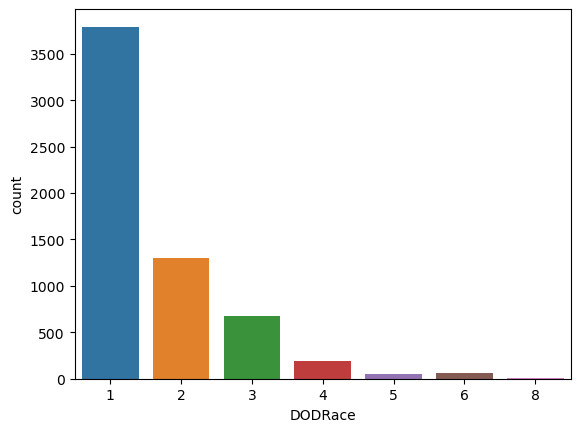

In [216]:
sns.countplot(x = 'DODRace', data = allData);

In [217]:
allData['DODRace'] = allData['DODRace']-1

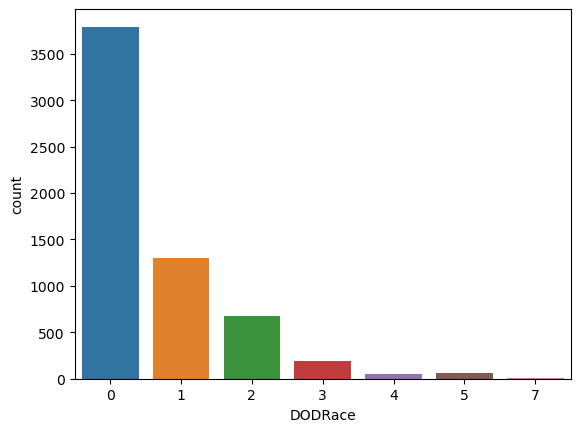

In [218]:
sns.countplot(x = 'DODRace', data = allData);

In [219]:
allData = allData[~allData['DODRace'].isin(allData['DODRace'].value_counts()[allData['DODRace'].value_counts()< 500].index)]

In [220]:
allData['DODRace'].value_counts()

0    3792
1    1298
2     679
Name: DODRace, dtype: int64

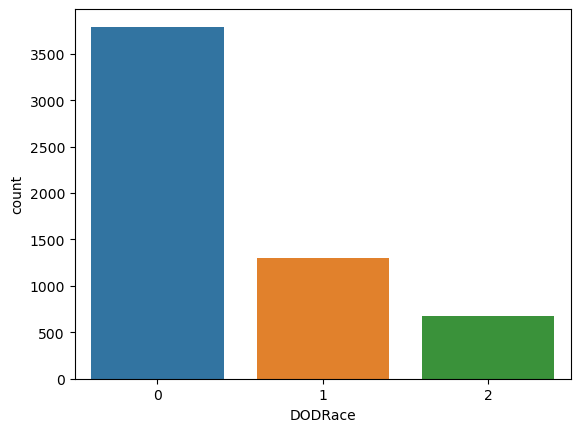

In [221]:
sns.countplot(x = 'DODRace', data = allData);

In [222]:
allData.corr(numeric_only=True)["DODRace"].drop("DODRace").sort_values()

sittingheight                    -0.324329
eyeheightsitting                 -0.319669
wristheight                      -0.267874
stature                          -0.232736
elbowrestheight                  -0.227899
Heightin                         -0.225612
lateralmalleolusheight           -0.218440
acromialheight                   -0.217393
cervicaleheight                  -0.215708
waistbacklength                  -0.208262
axillaheight                     -0.205576
bicristalbreadth                 -0.203874
suprasternaleheight              -0.203790
verticaltrunkcircumferenceusa    -0.196206
chestheight                      -0.193294
shoulderelbowlength              -0.179681
waistheightomphalion             -0.174910
wristcircumference               -0.174408
overheadfingertipreachsitting    -0.169650
waistfrontlengthsitting          -0.160391
handbreadth                      -0.158999
acromionradialelength            -0.158561
tenthribheight                   -0.158044
anklecircum

In [223]:
less_hundred = allData.SubjectsBirthLocation.value_counts()[allData.SubjectsBirthLocation.value_counts() <= 50].index

In [224]:
allData['SubjectsBirthLocation'] = allData['SubjectsBirthLocation'].replace(less_hundred,'other')

##### Now, based on the previous analysis and description of each column, we will decide which columns we will delete and which columns the model will work on.
# delete columns
-  date , subjectid : no effect
-  SubjectNumericRace : dublicates DODRace 
-  Installation : not usefull
-  Heightin , Weightlbs  dublicates rows from stature
df.drop(columns=drop_list2, inplace=True)

In [225]:
allData.drop(columns=['Date','SubjectId','SubjectNumericRace','Installation','Heightin','Weightlbs','PrimaryMOS'], inplace=True)

In [226]:
allData.shape

(5769, 100)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

divide our data to X(Features) and y(Target) the Target will be DODRace column and The remaining columns will be Features

In [227]:
x = allData.drop('DODRace',axis=1)
y = allData['DODRace']

In [228]:
x.shape

(5769, 99)

In [229]:
x.sample(1)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,SubjectsBirthLocation,Age,WritingPreference
1098,199,1302,316,212,1196,237,164,317,286,249,417,66,307,288,141,1007,216,798,551,453,368,1360,233,978,270,1154,749,625,335,27,54,19,247,737,93,225,303,267,486,417,978,77,191,167,151,542,182,306,64,351,390,969,610,366,380,430,490,458,65,399,109,325,363,1270,100,369,227,987,334,125,844,800,533,1578,1580,1301,1025,582,181,742,428,132,817,1571,399,292,795,185,361,942,640,150,765,Female,Regular Army,Combat Support,Germany,24,Right hand


In [230]:
y.shape

(5769,)

In [231]:
y.sample(1)

3988    0
Name: DODRace, dtype: int64

Divide the data into train and test sets the train will train set will be 80% of the total data and test set will be 80% of the total data

In [232]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [233]:
x_train.shape

(4615, 99)

In [234]:
y_train.shape

(4615,)

In [235]:
x_test.shape

(1154, 99)

In [236]:
y_test.shape

(1154,)

Check which columns are the columns that need to be

In [237]:
allDataobjectdescribe = allData.describe(include=['object'], exclude=['int64']).T
allDataobjectdescribe

,count,unique,top,freq
Gender,5769,2,Male,3899
Component,5769,3,Regular Army,2955
Branch,5769,3,Combat Service Support,3021
SubjectsBirthLocation,5769,4,United States,5235
WritingPreference,5769,3,Right hand,5088


In [238]:
columnsName = allDataobjectdescribe.index.tolist()

In [239]:
columnsName

['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference']

new we will transformer the columns that need to be transformer , i have used ordinal encoder and one-hot encoder
1. the columns i have used the ordinal encoder is:
- gender
- component
- branch
- writingpreference
2. the columns i have used the one-hot encoder  is
- subjectsbirthlocation


In [240]:
columnsName.remove('SubjectsBirthLocation')

In [241]:
columnsName

['Gender', 'Component', 'Branch', 'WritingPreference']

In [242]:
ordinalCategories = []
for i in columnsName  :
    ordinalCategories.append(allData[i].unique().tolist())


In [243]:
ordinalCategories

[['Female', 'Male'],
 ['Regular Army', 'Army National Guard', 'Army Reserve'],
 ['Combat Support', 'Combat Service Support', 'Combat Arms'],
 ['Right hand', 'Left hand', 'Either hand (No preference)']]

In [244]:
columnTransformer = make_column_transformer(
( OneHotEncoder(), ['SubjectsBirthLocation'] ),
( OrdinalEncoder(categories= ordinalCategories), columnsName ),
remainder = 'passthrough'
)

In [245]:
columnsName

['Gender', 'Component', 'Branch', 'WritingPreference']

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [246]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [247]:
operations = [("column_transformer", columnTransformer ), ("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(x_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['SubjectsBirthLocation']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male'],
                                                                             ['Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard',
                                                                              'Army '
                                                                              'Reserve'],
                                                                             ['Combat '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Service '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Arms'],
                                                                             ['Right '
                                                                              'hand',
                                                                              'Left '
                                                                              'hand',
                                                                              'Either '
                                                                              'hand '
                                                                              '(No '
                                                                              'preference)']]),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [248]:
eval_metric(pipe_model, x_train, y_train, x_test, y_test)

Test_Set
[[731   8  19]
 [ 24 234   2]
 [ 60  16  60]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       758
           1       0.91      0.90      0.90       260
           2       0.74      0.44      0.55       136

    accuracy                           0.89      1154
   macro avg       0.85      0.77      0.80      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[2936   29   69]
 [  54  967   17]
 [ 240   44  259]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3034
           1       0.93      0.93      0.93      1038
           2       0.75      0.48      0.58       543

    accuracy                           0.90      4615
   macro avg       0.86      0.79      0.82      4615
weighted avg       0.90      0.90      0.89      4615



In [249]:
scores = cross_validate(pipe_model,
                        x_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.885807
train_accuracy              0.902396
test_precision_weighted     0.877630
train_precision_weighted    0.896043
test_recall_weighted        0.885807
train_recall_weighted       0.902396
test_f1_weighted            0.877458
train_f1_weighted           0.895179
dtype: float64

### Logistic Model GridsearchCV

In [250]:
operations = [("column_transformer", columnTransformer ), ("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

In [251]:
pipe_model.get_params()

{'memory': None,
 'steps': [('column_transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder', OneHotEncoder(),
                                    ['SubjectsBirthLocation']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Female', 'Male'],
                                                               ['Regular Army',
                                                                'Army National '
                                                                'Guard',
                                                                'Army Reserve'],
                                                               ['Combat Support',
                                                                'Combat Service '
                                                                'Support',
                                                                'Combat Arms']

In [252]:
lr_param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1],
              'logisticregression__class_weight': ['balanced', {'White':1,'Hispanic':3.5,'Black':2}, 
              {'White':1,'Hispanic':4,'Black':2.5}, {'White':1,'Hispanic':4.5,'Black':2}],
              'logisticregression__penalty': ['l1', 'l2'],
              'logisticregression__solver': ['liblinear','sag','saga','newton-cg'],
              }

In [253]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5]
weight = ['balanced', None]
param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__class_weight": weight}
grid_model = GridSearchCV(pipe_model, param_grid = param_grid, cv=10, n_jobs=-1, return_train_score=True)
grid_model.fit(x_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['SubjectsBirthLocation']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Female',
                                                                                                     'Male'],
                                                                                                    ['Regular '
                                                                                                     'Army',
                                                                                                     'Army '
                                                                                                     'National '
                                                                                                     'Guard',
                                                                                                     'Army '
                                                                                                     'Reserve'],
                                                                                                    ['Combat '
                                                                                                     'Support',
                                                                                                     'Combat '
                                                                                                     'Service '
                                                                                                     'Support',
                                                                                                     'Combat '
                                                                                                     'Arms'],
                                                                                                    ['Right '
                                                                                                     'hand',
                                                                                                     'Left '
                                                                                                     'hand',
                                                                                                     'Either '
                                                                                                     'hand '
                                                                                                     '(No '
                                                                                                     'preference)']]),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference'])])),
                                       ('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 5],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True)

In [254]:
grid_model.best_params_

{'logistic__C': 0.1, 'logistic__class_weight': None, 'logistic__penalty': 'l2'}

In [255]:
grid_model.best_estimator_

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['SubjectsBirthLocation']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male'],
                                                                             ['Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard',
                                                                              'Army '
                                                                              'Reserve'],
                                                                             ['Combat '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Service '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Arms'],
                                                                             ['Right '
                                                                              'hand',
                                                                              'Left '
                                                                              'hand',
                                                                              'Either '
                                                                              'hand '
                                                                              '(No '
                                                                              'preference)']]),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=0.1))])

In [256]:
eval_metric(grid_model, x_train, y_train, x_test, y_test)

Test_Set
[[740   3  15]
 [ 21 238   1]
 [ 62  15  59]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       758
           1       0.93      0.92      0.92       260
           2       0.79      0.43      0.56       136

    accuracy                           0.90      1154
   macro avg       0.87      0.78      0.81      1154
weighted avg       0.89      0.90      0.89      1154


Train_Set
[[2937   35   62]
 [  69  953   16]
 [ 253   37  253]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3034
           1       0.93      0.92      0.92      1038
           2       0.76      0.47      0.58       543

    accuracy                           0.90      4615
   macro avg       0.87      0.78      0.81      4615
weighted avg       0.89      0.90      0.89      4615



In [257]:
pd.DataFrame(grid_model.cv_results_).loc[
    grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.889059
mean_train_score    0.899314
Name: 7, dtype: object

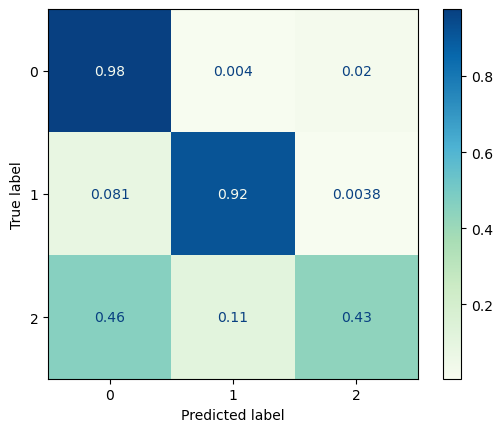

In [258]:
ConfusionMatrixDisplay.from_estimator(grid_model,x_test, y_test,normalize='true', cmap='GnBu');

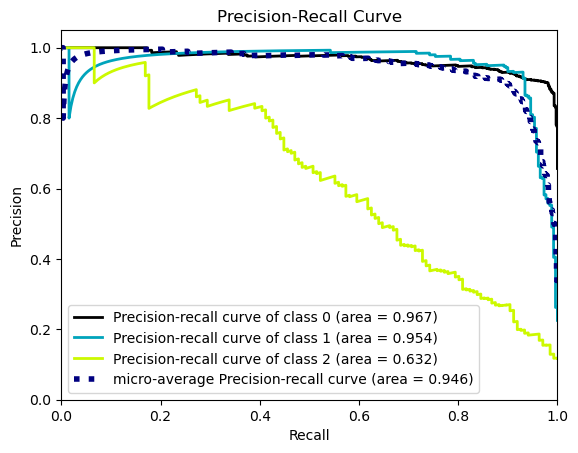

In [259]:
y_pred_proba = grid_model.predict_proba(x_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [302]:
y_pred = grid_model.predict(x_test)
y_test_dummies = pd.get_dummies(y_test).values 
log_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2])
log_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
log_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## 2. SVC

### Vanilla SVC model 

In [261]:
svm = SVC()

svm_pipe = make_pipeline(columnTransformer, MinMaxScaler(), svm)

svm_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['SubjectsBirthLocation']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male'],
                                                                             ['Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard',
                                                                              'Army '
                                                                              'Reserve'],
                                                                             ['Combat '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Service '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Arms'],
                                                                             ['Right '
                                                                              'hand',
                                                                              'Left '
                                                                              'hand',
                                                                              'Either '
                                                                              'hand '
                                                                              '(No '
                                                                              'preference)']]),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('minmaxscaler', MinMaxScaler()), ('svc', SVC())])

In [262]:
eval_metric(svm_pipe, x_train, y_train, x_test, y_test)

Test_Set
[[744   5   9]
 [ 26 232   2]
 [ 82  14  40]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       758
           1       0.92      0.89      0.91       260
           2       0.78      0.29      0.43       136

    accuracy                           0.88      1154
   macro avg       0.86      0.72      0.75      1154
weighted avg       0.87      0.88      0.86      1154


Train_Set
[[2990   19   25]
 [  75  958    5]
 [ 348   36  159]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3034
           1       0.95      0.92      0.93      1038
           2       0.84      0.29      0.43       543

    accuracy                           0.89      4615
   macro avg       0.89      0.73      0.77      4615
weighted avg       0.89      0.89      0.87      4615



###  SVC Model GridsearchCV

In [263]:
svm_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder', OneHotEncoder(),
                                    ['SubjectsBirthLocation']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Female', 'Male'],
                                                               ['Regular Army',
                                                                'Army National '
                                                                'Guard',
                                                                'Army Reserve'],
                                                               ['Combat Support',
                                                                'Combat Service '
                                                                'Support',
                                                                'Combat Arms'],

In [264]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", None]}

In [265]:
operations = [("column_transformer", columnTransformer ), ("scaler", StandardScaler()), ("SVC", SVC(probability=True))]
pipe_model = Pipeline(steps=operations)
svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="f1_weighted",
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)
svm_model_grid.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['SubjectsBirthLocation']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Female',
                                                                                                     'Male'],
                                                                                                    ['Regular '
                                                                                                     'Army',
                                                                                                     'Army '
                                                                                                     'National '
                                                                                                     'Guard',
                                                                                                     'Army '
                                                                                                     'Reserve'],
                                                                                                    ['Combat '
                                                                                                     'Support',
                                                                                                     'Combat '
                                                                                                     'Service '
                                                                                                     'Support',...
                                                                                                     'hand '
                                                                                                     '(No '
                                                                                                     'preference)']]),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference'])])),
                                       ('scaler', StandardScaler()),
                                       ('SVC', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='f1_weighted')

In [266]:
svm_model_grid.best_params_

{'SVC__C': 0.1,
 'SVC__class_weight': None,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}

In [267]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]


mean_test_score     0.877478
mean_train_score    0.890346
Name: 57, dtype: object

In [268]:
eval_metric(svm_model_grid, x_train, y_train, x_test, y_test)

Test_Set
[[745   4   9]
 [ 20 238   2]
 [ 65  11  60]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       758
           1       0.94      0.92      0.93       260
           2       0.85      0.44      0.58       136

    accuracy                           0.90      1154
   macro avg       0.89      0.78      0.82      1154
weighted avg       0.90      0.90      0.89      1154


Train_Set
[[2945   39   50]
 [  64  960   14]
 [ 257   40  246]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3034
           1       0.92      0.92      0.92      1038
           2       0.79      0.45      0.58       543

    accuracy                           0.90      4615
   macro avg       0.87      0.78      0.81      4615
weighted avg       0.89      0.90      0.89      4615



In [269]:
y_pred = svm_model_grid.predict(x_test)
y_test_dummies = pd.get_dummies(y_test).values 
svm_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2]) 
svm_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
svm_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## 3. RF

### Vanilla RF Model

In [271]:
operations = [("column_transformer", columnTransformer ), ("random", RandomForestClassifier(random_state=101))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(x_train, y_train)
eval_metric(pipe_model, x_train, y_train, x_test, y_test)

Test_Set
[[741  13   4]
 [ 58 201   1]
 [101  15  20]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       758
           1       0.88      0.77      0.82       260
           2       0.80      0.15      0.25       136

    accuracy                           0.83      1154
   macro avg       0.83      0.63      0.65      1154
weighted avg       0.83      0.83      0.80      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### RF Model GridsearchCV

In [272]:
pipe_model.get_params()

{'memory': None,
 'steps': [('column_transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder', OneHotEncoder(),
                                    ['SubjectsBirthLocation']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Female', 'Male'],
                                                               ['Regular Army',
                                                                'Army National '
                                                                'Guard',
                                                                'Army Reserve'],
                                                               ['Combat Support',
                                                                'Combat Service '
                                                                'Support',
                                                                'Combat Arms']

In [273]:
param_grid = {
    "RF_model__n_estimators": [400, 500],
    "RF_model__max_depth": [2, 3],

}
operations_rf = [
    ("OrdinalEncoder", columnTransformer),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(
    model, param_grid, scoring=make_scorer(f1_score, average='weighted'), n_jobs=-1, return_train_score=True
)
rf_grid_model.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['SubjectsBirthLocation']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Female',
                                                                                                     'Male'],
                                                                                                    ['Regular '
                                                                                                     'Army',
                                                                                                     'Army '
                                                                                                     'National '
                                                                                                     'Guard',
                                                                                                     'Army '
                                                                                                     'Reserve'],
                                                                                                    ['Combat '
                                                                                                     'Support',
                                                                                                     'Combat '
                                                                                                     'Service '
                                                                                                     'Support',
                                                                                                     'Combat '
                                                                                                     'A...
                                                                                                    ['Right '
                                                                                                     'hand',
                                                                                                     'Left '
                                                                                                     'hand',
                                                                                                     'Either '
                                                                                                     'hand '
                                                                                                     '(No '
                                                                                                     'preference)']]),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference'])])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=weighted))

In [274]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3, 'RF_model__n_estimators': 500}

In [275]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['SubjectsBirthLocation']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male'],
                                                                             ['Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard',
                                                                              'Army '
                                                                              'Reserve'],
                                                                             ['Combat '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Service '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Arms'],
                                                                             ['Right '
                                                                              'hand',
                                                                              'Left '
                                                                              'hand',
                                                                              'Either '
                                                                              'hand '
                                                                              '(No '
                                                                              'preference)']]),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=500, random_state=101))])

In [276]:
eval_metric(rf_grid_model, x_train, y_train, x_test, y_test)

Test_Set
[[462  70 226]
 [ 23 185  52]
 [ 32  17  87]]
              precision    recall  f1-score   support

           0       0.89      0.61      0.72       758
           1       0.68      0.71      0.70       260
           2       0.24      0.64      0.35       136

    accuracy                           0.64      1154
   macro avg       0.60      0.65      0.59      1154
weighted avg       0.77      0.64      0.67      1154


Train_Set
[[1833  284  917]
 [  88  797  153]
 [ 125   46  372]]
              precision    recall  f1-score   support

           0       0.90      0.60      0.72      3034
           1       0.71      0.77      0.74      1038
           2       0.26      0.69      0.37       543

    accuracy                           0.65      4615
   macro avg       0.62      0.69      0.61      4615
weighted avg       0.78      0.65      0.68      4615



In [277]:
y_pred = rf_grid_model.predict(x_test)
y_test_dummies = pd.get_dummies(y_test).values 
random_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2]) 
random_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
random_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## 4. XGBoost

### Vanilla XGBoost Model

In [279]:
xgb_model = XGBClassifier(random_state=101)
step4 = [("OneHotEncoder", columnTransformer),("model", xgb_model)]
xgb_pipe = Pipeline(steps=step4)

In [280]:
xgb_pipe.fit(x_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['SubjectsBirthLocation']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male'],
                                                                             ['Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard',
                                                                              'Army '
                                                                              'Reserve'],
                                                                             ['Combat '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Service '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Arms'],
                                                                             ['Right '
                                                                              'hand',
                                                                              'Le...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [281]:
eval_metric(xgb_pipe, x_train, y_train_le, x_test, y_test_le)

Test_Set
[[733   8  17]
 [ 27 228   5]
 [ 79  14  43]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       758
           1       0.91      0.88      0.89       260
           2       0.66      0.32      0.43       136

    accuracy                           0.87      1154
   macro avg       0.82      0.72      0.75      1154
weighted avg       0.86      0.87      0.85      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### XGBoost Model GridsearchCV

In [282]:
param_grid = {
    "model__n_estimators": [20,40],
    "model__max_depth": [1, 2 ,3],
    "model__learning_rate": [0.05, 0.5,1],
    "model__subsample": [0.8, 1],
    "model__colsample_bytree": [0.8, 1],
}

xgb_grid_model = GridSearchCV(
    xgb_pipe,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]), 
    cv=5,
    n_jobs=-1)
xgb_grid_model.fit(x_train, y_train_le)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['SubjectsBirthLocation']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Female',
                                                                                                     'Male'],
                                                                                                    ['Regular '
                                                                                                     'Army',
                                                                                                     'Army '
                                                                                                     'National '
                                                                                                     'Guard',
                                                                                                     'Army '
                                                                                                     'Reserve'],
                                                                                                    ['Combat '
                                                                                                     'Support',
                                                                                                     'Combat '
                                                                                                     'Service '
                                                                                                     'Support',
                                                                                                     'Comba...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.8, 1],
                         'model__learning_rate': [0.05, 0.5, 1],
                         'model__max_depth': [1, 2, 3],
                         'model__n_estimators': [20, 40],
                         'model__subsample': [0.8, 1]},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [283]:
xgb_grid_model.best_params_

{'model__colsample_bytree': 1,
 'model__learning_rate': 0.5,
 'model__max_depth': 3,
 'model__n_estimators': 40,
 'model__subsample': 0.8}

In [284]:
eval_metric(xgb_grid_model, x_train, y_train_le, x_test, y_test_le)

Test_Set
[[731   8  19]
 [ 35 221   4]
 [ 70  18  48]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       758
           1       0.89      0.85      0.87       260
           2       0.68      0.35      0.46       136

    accuracy                           0.87      1154
   macro avg       0.82      0.72      0.75      1154
weighted avg       0.86      0.87      0.85      1154


Train_Set
[[3006    9   19]
 [  43  993    2]
 [ 188   17  338]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3034
           1       0.97      0.96      0.97      1038
           2       0.94      0.62      0.75       543

    accuracy                           0.94      4615
   macro avg       0.95      0.86      0.89      4615
weighted avg       0.94      0.94      0.94      4615



In [299]:
y_pred = xgb_grid_model.predict(x_test)
y_test_dummies = pd.get_dummies(y_test).values 
xgb_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2]) 
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=[2])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=[2])

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [285]:
!pip install imblearn

In [286]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Logistic Regression Over/ Under Sampling

In [287]:
steps5 = [('transformer', columnTransformer), ('under', RandomUnderSampler(sampling_strategy = "not majority", random_state = 101)) ,('scaler', StandardScaler()),
            ('logistic', LogisticRegression())]
pipe_os_lr = Pipeline(steps=steps5)
pipe_os_lr.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['SubjectsBirthLocation']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male'],
                                                                             ['Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard',
                                                                              'Army '
                                                                              'Reserve'],
                                                                             ['Combat '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Service '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Arms'],
                                                                             ['Right '
                                                                              'hand',
                                                                              'Left '
                                                                              'hand',
                                                                              'Either '
                                                                              'hand '
                                                                              '(No '
                                                                              'preference)']]),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('under',
                 RandomUnderSampler(random_state=101,
                                    sampling_strategy='not majority')),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [288]:
eval_metric(pipe_os_lr, x_train, y_train, x_test, y_test)

Test_Set
[[736   1  21]
 [ 28 224   8]
 [ 62  10  64]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       758
           1       0.95      0.86      0.91       260
           2       0.69      0.47      0.56       136

    accuracy                           0.89      1154
   macro avg       0.84      0.77      0.80      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[2945   16   73]
 [  83  927   28]
 [ 246   28  269]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3034
           1       0.95      0.89      0.92      1038
           2       0.73      0.50      0.59       543

    accuracy                           0.90      4615
   macro avg       0.86      0.79      0.82      4615
weighted avg       0.89      0.90      0.89      4615



In [289]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]
weight = ['balanced', None]
param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__class_weight": weight}
grid_model = GridSearchCV(pipe_os_lr, param_grid = param_grid, cv=5, return_train_score=True,
                          scoring=make_scorer(f1_score, average = None,labels =[3]))
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['SubjectsBirthLocation']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Female',
                                                                                                     'Male'],
                                                                                                    ['Regular '
                                                                                                     'Army',
                                                                                                     'Army '
                                                                                                     'National '
                                                                                                     'Guard',
                                                                                                     'Army '
                                                                                                     'Reserve'],
                                                                                                    ['Combat '
                                                                                                     'Support',
                                                                                                     'Combat '
                                                                                                     'Service '
                                                                                                     'Support',
                                                                                                     'Combat '...
                                       ('under',
                                        RandomUnderSampler(random_state=101,
                                                           sampling_strategy='not '
                                                                             'majority')),
                                       ('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [290]:
grid_model.best_params_

{'logistic__C': 0.01,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l2'}

In [291]:
eval_metric(grid_model, x_train, y_train, x_test, y_test)

Test_Set
[[629  14 115]
 [ 11 235  14]
 [ 28  13  95]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       758
           1       0.90      0.90      0.90       260
           2       0.42      0.70      0.53       136

    accuracy                           0.83      1154
   macro avg       0.75      0.81      0.77      1154
weighted avg       0.87      0.83      0.84      1154


Train_Set
[[2548   78  408]
 [  32  949   57]
 [ 109   37  397]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3034
           1       0.89      0.91      0.90      1038
           2       0.46      0.73      0.57       543

    accuracy                           0.84      4615
   macro avg       0.77      0.83      0.79      4615
weighted avg       0.88      0.84      0.85      4615



In [303]:
y_pred = grid_model.predict(x_test)
y_pred_proba = grid_model.predict_proba(x_test)
y_test_dummies = pd.get_dummies(y_test).values 
over_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2])
over_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
over_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [292]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test,  pipe_model.predict(x_test))

0.650876648372742

In [293]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test,  pipe_model.predict(x_test))

0.6222688961021249

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

Choose the model that works best based on your chosen metric

In [305]:

arr = [[log_f1[0],'Logistic Regression'],[svm_f1,'SVM'],[random_f1,'RF'],[xgb_f1[0],'XGB'],[over_f1[0],'Over Sample Logistic Regression']]

In [307]:
max_f1 = arr[0]
for i in range (1, len (arr)):
    if arr[i][0]> max_f1[0] :
        max_f1 = arr[i]
print("the best model based on f1 is "+ max_f1[1])  

the best model based on f1 is XGB


now save and load the bast model

In [308]:
final_pipe = Pipeline(steps=[('transformer', columnTransformer), ('under', RandomUnderSampler(sampling_strategy = "not majority", random_state = 101)) ,('scaler', StandardScaler()),
            ('XGB', XGBClassifier())])
final_pipe.fit(x, y)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['SubjectsBirthLocation']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male'],
                                                                             ['Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard',
                                                                              'Army '
                                                                              'Reserve'],
                                                                             ['Combat '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Service '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Arms'],
                                                                             ['Right '
                                                                              'hand',
                                                                              'Left...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [309]:
import pickle
pickle.dump(final_pipe, open('solider_race_final_model', 'wb'))
loaded_model = pickle.load(open('solider_race_final_model', 'rb'))


In [310]:
y_pred = loaded_model.predict(x)
confusion_matrix(y, y_pred)


array([[3792,    0,    0],
       [ 120, 1158,   20],
       [   0,    0,  679]], dtype=int64)

In [312]:
classification_report(y, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98      3792\n           1       1.00      0.89      0.94      1298\n           2       0.97      1.00      0.99       679\n\n    accuracy                           0.98      5769\n   macro avg       0.98      0.96      0.97      5769\nweighted avg       0.98      0.98      0.98      5769\n'

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___